# Python Notebooks, Data Visualization and Data Fitting

Título: Python Notebooks, Data Visualization and Data Fitting

Resumo: Apresentação de novas técnicas de tratamento de dados e visualização seguindo as tendências em tratamento de dados com muito volume, e aplicação de estatística nos dados. 

Publico: qualquer um que tenha interesse em tratamento e visualização de dados

Referencia: https://github.com/LeonardoLeano333/hmtools

Referencia: https://jupyter.org/

Referencia: https://gadm.org/download_country_v3.html

Referencia de exemplos: https://matplotlib.org/tutorials/introductory/sample_plots.html

Referencia da base de dados: http://dados.gov.br/dataset/unidades-basicas-de-saude-ubs/resource/2f34c274-7001-4c51-ba7c-b3f93e730f78

In [1]:
import numpy as np # math library
import pandas as pd # data import
import matplotlib.pyplot as plt # visualization
import seaborn as sns #visualizacao
import geopandas as gpd #geopandas for drawing brasil

necessário para a leitura de arquivos excel (.xlxs) : 

In [2]:
#! pip install xlrd 
#! pip install geopandas
#! pip install numpy,matplotlib, seaborn,pandas
#folow the geo pandas installation
#referencia http://geopandas.org/install.html

# Importação e Limpesa de dados (Data Cleaning)

Exemplo: Unidades Básicas de Saúde em CSV (21/Agosto/2013)

Referência: http://dados.gov.br/dataset/unidades-basicas-de-saude-ubs/resource/2f34c274-7001-4c51-ba7c-b3f93e730f78

### Do resumo do conjunto de dados

As Unidades Básicas de Saúde (UBS) são a porta de entrada preferencial do Sistema Único de Saúde (SUS). O objetivo desses postos é atender até 80% dos problemas de saúde da população, sem...

### Formatação de dados

In [3]:
dados = pd.read_csv('ubs.csv',sep=',')
uf_br1 = gpd.read_file('gadm36_BRA_1.shp')

In [4]:
dados.head()

,vlr_latitude,vlr_longitude,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_telefone,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos
0,-10.911237,-37.062078,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,Aracaju,7931791326,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média
1,-9.485943,-35.857573,270770,6685315,USF ENFERMEIRO PEDRO JACINTO AREA 09,R 15 DE AGOSTO,CENTRO,Rio Largo,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
2,-23.896000,-53.410000,411885,6811299,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,RUA GUILHERME BRUXEL,CENTRO,Perobal,4436251462,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média
3,-16.447874,-41.009860,313580,6335616,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,RUA TEOFILO OTONI,ALDEIA,Jequitinhonha,3337411423,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
4,-6.573311,-35.107605,250930,6662226,POSTO ANCORA URUBA,RODOVIA PB N 065,SITIO,Mataraca,Não se aplica,Desempenho acima da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média


In [5]:
dados.keys()

Index(['vlr_latitude', 'vlr_longitude', 'cod_munic', 'cod_cnes', 'nom_estab',
       'dsc_endereco', 'dsc_bairro', 'dsc_cidade', 'dsc_telefone',
       'dsc_estrut_fisic_ambiencia', 'dsc_adap_defic_fisic_idosos',
       'dsc_equipamentos', 'dsc_medicamentos'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

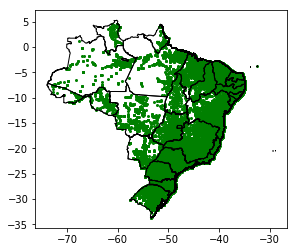

In [6]:
plt.figure(1)
uf_br1.plot(color='',edgecolor='black',zorder=10)
plt.plot(dados['vlr_longitude'],dados['vlr_latitude'],marker='o',color='g',linestyle = ' ',markersize=2 )
plt.show()

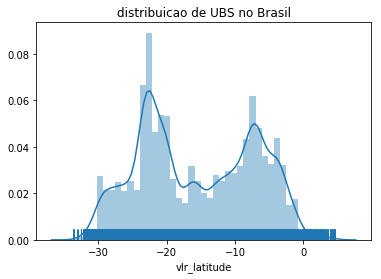

In [7]:
plt.figure(1)
plt.title('distribuicao de UBS no Brasil')
sns.distplot(dados['vlr_latitude'],rug=True)

<Figure size 432x288 with 0 Axes>

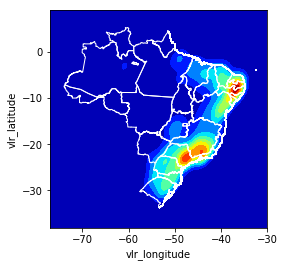

In [8]:
plt.figure(1)
uf_br1.plot(color='',edgecolor='white',zorder=10)
sns.kdeplot(dados['vlr_longitude']-1, dados['vlr_latitude'], cmap="jet", shade=True, shade_lowest=True, zorder=1)
plt.xlim(-77,-30)
plt.show()

# Filtro da metade do brasil pra baixo

In [9]:
dados_metade_sul = dados[dados['vlr_latitude']< -15]

<Figure size 432x288 with 0 Axes>

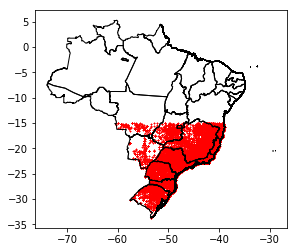

In [10]:
plt.figure(1)
uf_br1.plot(color='',edgecolor='black',zorder=10)
plt.plot(dados_metade_sul['vlr_longitude'],dados_metade_sul['vlr_latitude'],marker='+',color='red',linestyle = ' ',markersize=2)
plt.show()

Numero de UBS da parte sul do país

In [11]:
len(dados_metade_sul)

20168

Na parte norte

In [12]:
len(dados)- len(dados_metade_sul)

17522

porcentagem no sul

In [13]:
len(dados_metade_sul)/len(dados)

0.53510214911117